In [4]:
import pandas as pd

urls = [
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv'
]

# Read each CSV into a DataFrame and store in a list
dataframes = [pd.read_csv(url) for url in urls]

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
display(df.head())




Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

In [9]:
from google.colab import files

files.download("tiendas_combinadas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import pandas as pd

# URLs de las 4 tiendas
urls = [
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv'
]

# Cargar y unir
dataframes = []
for i, url in enumerate(urls, start=1):
    df_temp = pd.read_csv(url)
    df_temp["Tienda"] = f"Tienda_{i}"  # Identificador de tienda
    dataframes.append(df_temp)

df = pd.concat(dataframes, ignore_index=True)

# --- 1. Ventas totales por tienda ---
ventas_totales = df.groupby("Tienda")["Precio"].sum().reset_index(name="Ventas Totales")

# --- 2. Categor√≠a m√°s y menos vendida por tienda ---
ventas_categoria = df.groupby(["Tienda", "Categor√≠a del Producto"])["Precio"].sum().reset_index()
cat_max = ventas_categoria.loc[ventas_categoria.groupby("Tienda")["Precio"].idxmax()][["Tienda", "Categor√≠a del Producto", "Precio"]]
cat_min = ventas_categoria.loc[ventas_categoria.groupby("Tienda")["Precio"].idxmin()][["Tienda", "Categor√≠a del Producto", "Precio"]]
cat_max.rename(columns={"Categor√≠a del Producto": "Categoria M√°s Vendida", "Precio": "Ventas Categoria M√°x"}, inplace=True)
cat_min.rename(columns={"Categor√≠a del Producto": "Categoria Menos Vendida", "Precio": "Ventas Categoria M√≠n"}, inplace=True)

# --- 3. Calificaci√≥n promedio ---
calificacion_prom = df.groupby("Tienda")["Calificaci√≥n"].mean().reset_index(name="Calificaci√≥n Promedio")

# --- 4. Producto m√°s vendido y en qu√© tienda ---
ventas_producto = df.groupby(["Tienda", "Producto"])["Precio"].sum().reset_index()
prod_max = ventas_producto.loc[ventas_producto.groupby("Tienda")["Precio"].idxmax()][["Tienda", "Producto", "Precio"]]
prod_max.rename(columns={"Producto": "Producto M√°s Vendido", "Precio": "Ventas Producto M√°x"}, inplace=True)

# --- 5. Costo de env√≠o total por tienda ---
costo_envio = df.groupby("Tienda")["Costo de env√≠o"].sum().reset_index(name="Costo Env√≠o Total")

# --- Unir todo ---
comparativo = ventas_totales.merge(cat_max, on="Tienda")
comparativo = comparativo.merge(cat_min, on="Tienda")
comparativo = comparativo.merge(calificacion_prom, on="Tienda")
comparativo = comparativo.merge(prod_max, on="Tienda")
comparativo = comparativo.merge(costo_envio, on="Tienda")

# Exportar a CSV para compartir
comparativo.to_csv("analisis_tiendas.csv", index=False)

comparativo

Tienda  Ventas Totales Categoria M√°s Vendida  Ventas Categoria M√°x  \
0  Tienda_1    1.150880e+09          Electr√≥nicos           429493500.0   
1  Tienda_2    1.116344e+09          Electr√≥nicos           410831100.0   
2  Tienda_3    1.098020e+09          Electr√≥nicos           410775800.0   
3  Tienda_4    1.038376e+09          Electr√≥nicos           409476100.0   

  Categoria Menos Vendida  Ventas Categoria M√≠n  Calificaci√≥n Promedio  \
0                  Libros             8784900.0               3.976685   
1                  Libros            10091200.0               4.037304   
2                  Libros             9498700.0               4.048326   
3                  Libros             9321300.0               3.995759   

  Producto M√°s Vendido  Ventas Producto M√°x  Costo Env√≠o Total  
0        TV LED UHD 4K          142150200.0         61377900.0  
1            Iphone 15          113225800.0         59485100.0  
2         Refrigerador           99889700.0         58516600.0  
3            Iphone 15           96697500.0         55317400.0

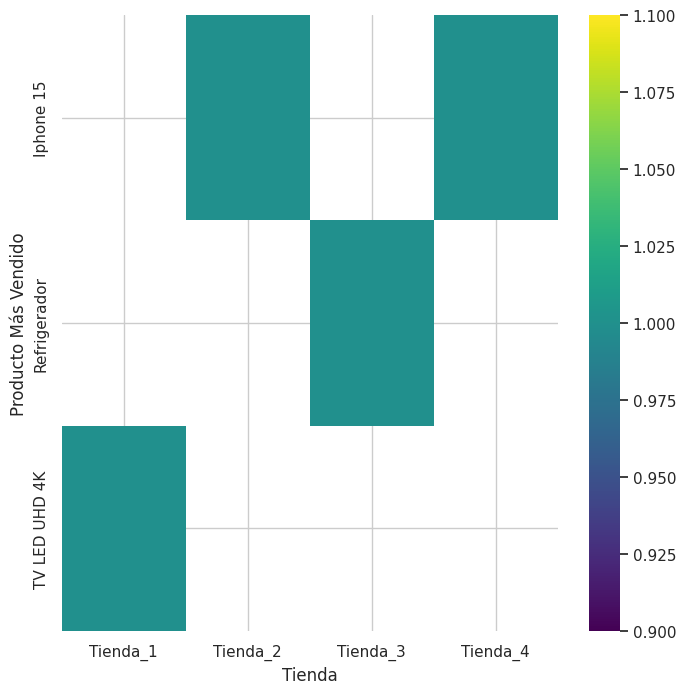

In [21]:
# title Tienda vs Producto M√°s Vendido

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Producto M√°s Vendido'].value_counts()
    for x_label, grp in comparativo.groupby('Tienda')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Tienda')
_ = plt.ylabel('Producto M√°s Vendido')

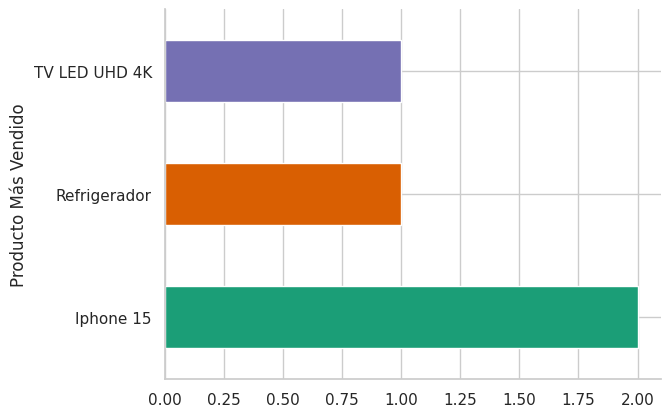

In [19]:
# @title Producto M√°s Vendido

from matplotlib import pyplot as plt
import seaborn as sns
comparativo.groupby('Producto M√°s Vendido').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-1064838966.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Ventas Totales", data=comparativo, palette=corporate_palette)


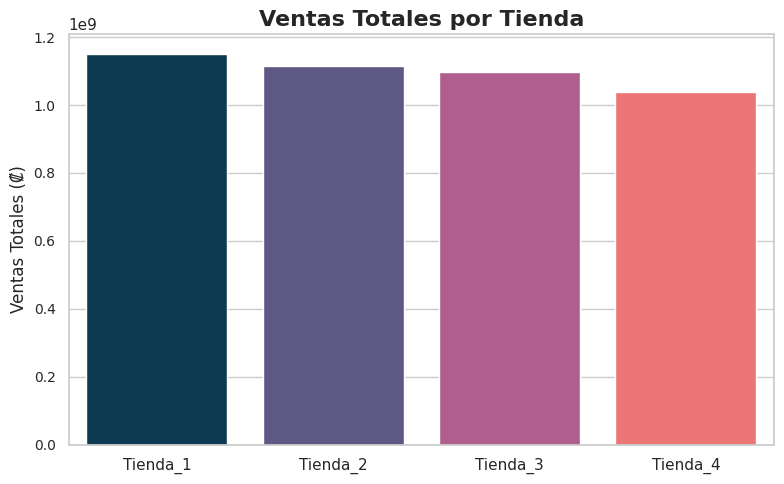

/tmp/ipython-input-1064838966.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Costo Env√≠o Total", data=comparativo, palette=corporate_palette)


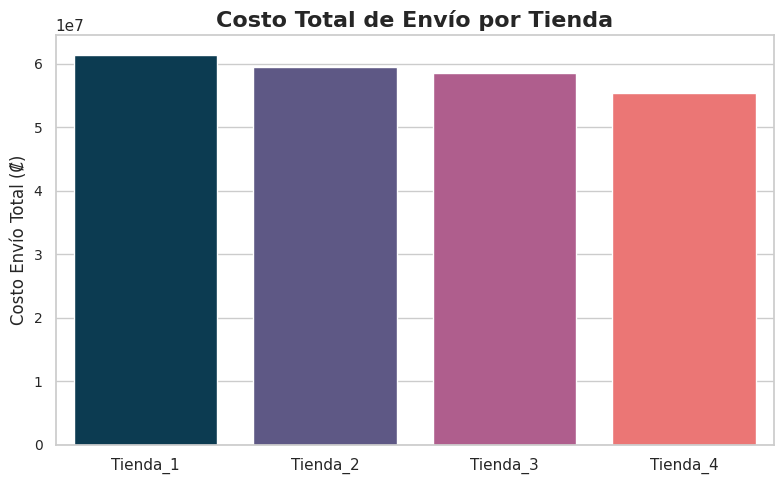

/tmp/ipython-input-1064838966.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Calificaci√≥n Promedio", data=comparativo, palette=corporate_palette)


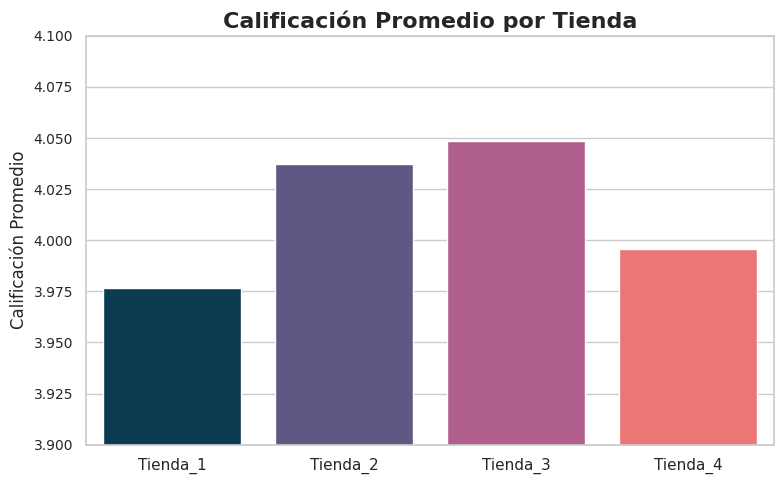

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n de estilo profesional
sns.set_theme(style="whitegrid", palette="muted")
corporate_palette = ["#003f5c", "#58508d", "#bc5090", "#ff6361"]

# --- 1. Ventas totales por tienda ---
plt.figure(figsize=(8,5))
sns.barplot(x="Tienda", y="Ventas Totales", data=comparativo, palette=corporate_palette)
plt.title("Ventas Totales por Tienda", fontsize=16, weight='bold')
plt.ylabel("Ventas Totales (‚Ç°)", fontsize=12)
plt.xlabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# --- 2. Costo de env√≠o por tienda ---
plt.figure(figsize=(8,5))
sns.barplot(x="Tienda", y="Costo Env√≠o Total", data=comparativo, palette=corporate_palette)
plt.title("Costo Total de Env√≠o por Tienda", fontsize=16, weight='bold')
plt.ylabel("Costo Env√≠o Total (‚Ç°)", fontsize=12)
plt.xlabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# --- 3. Calificaci√≥n promedio ---
plt.figure(figsize=(8,5))
sns.barplot(x="Tienda", y="Calificaci√≥n Promedio", data=comparativo, palette=corporate_palette)
plt.title("Calificaci√≥n Promedio por Tienda", fontsize=16, weight='bold')
plt.ylabel("Calificaci√≥n Promedio", fontsize=12)
plt.ylim(3.9, 4.1)
plt.xlabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

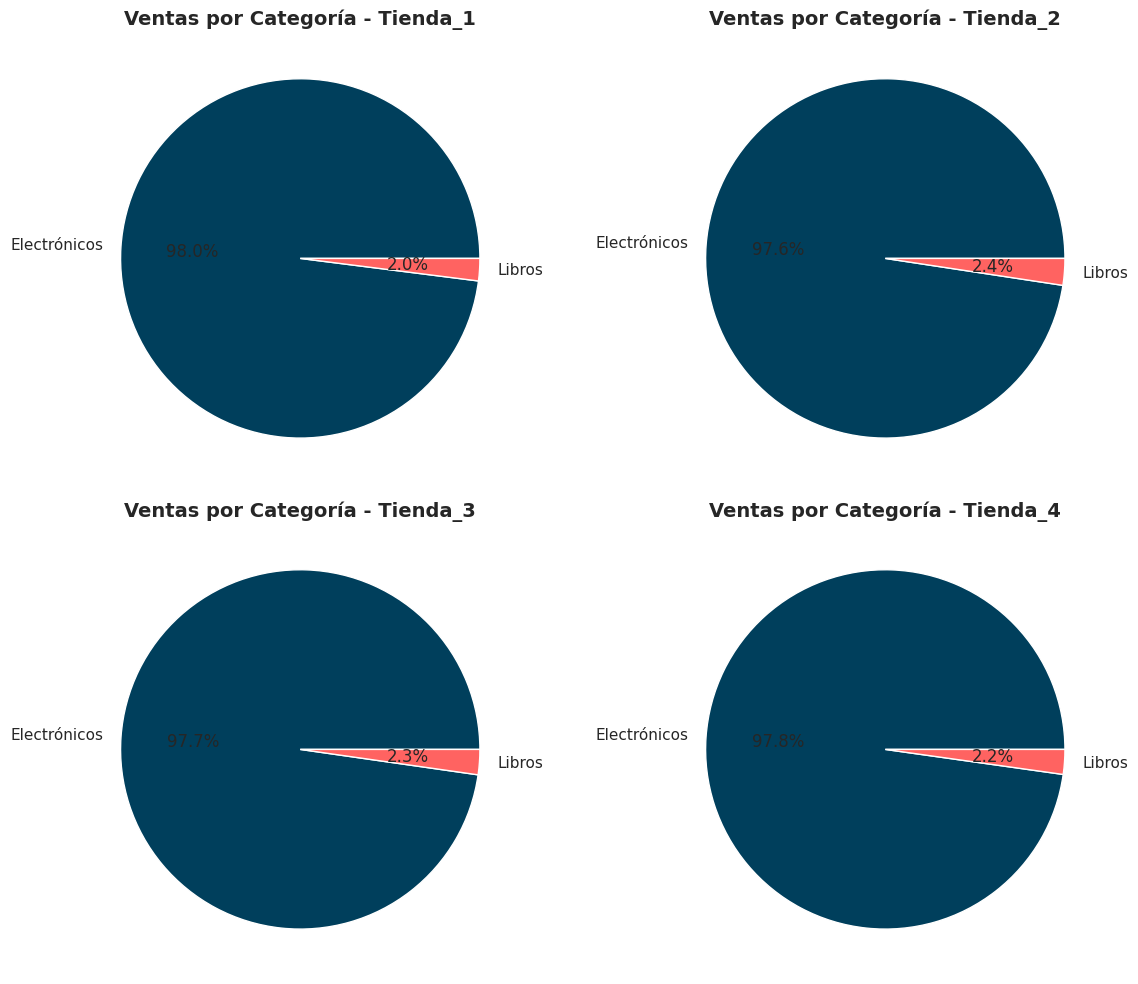

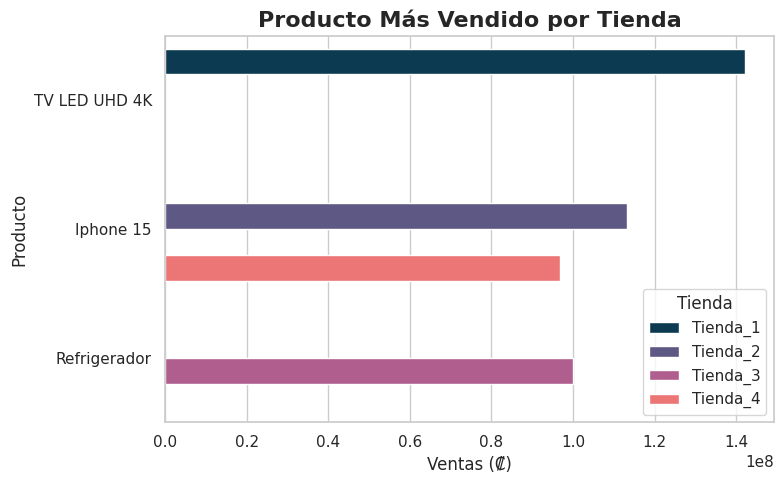

In [25]:
# --- 4. Ventas por categor√≠a (gr√°fico de pastel para cada tienda)
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

for i, (index, row) in enumerate(comparativo.iterrows()):
    tienda = row["Tienda"]
    # Dato para gr√°ficos de pastel
    data = {
        row["Categoria M√°s Vendida"]: row["Ventas Categoria M√°x"],
        row["Categoria Menos Vendida"]: row["Ventas Categoria M√≠n"]
    }

    ax = axes[i]
    ax.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', colors=[corporate_palette[0], corporate_palette[3]])
    ax.set_title(f"Ventas por Categor√≠a - {tienda}", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

# --- 5. Ranking de productos m√°s vendidos ---
plt.figure(figsize=(8,5))
sns.barplot(x="Ventas Producto M√°x", y="Producto M√°s Vendido", hue="Tienda", data=comparativo, palette=corporate_palette)
plt.title("Producto M√°s Vendido por Tienda", fontsize=16, weight='bold')
plt.xlabel("Ventas (‚Ç°)", fontsize=12)
plt.ylabel("Producto", fontsize=12)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

In [ ]:
#Conclusiones finales

1Ô∏è‚É£ Resumen de resultados clave
Tienda	Ventas Totales	Calificaci√≥n Promedio	Costo Env√≠o Total	Categor√≠a m√°s vendida	Producto m√°s vendido
Tienda 1	‚Ç°1,150,880,000	3.98 ‚≠ê	‚Ç°61,377,900	Electr√≥nicos	TV LED UHD 4K
Tienda 2	‚Ç°1,116,344,000	4.04 ‚≠ê	‚Ç°59,485,100	Electr√≥nicos	iPhone 15
Tienda 3	‚Ç°1,098,020,000	4.05 ‚≠ê	‚Ç°58,516,600	Electr√≥nicos	Refrigerador
Tienda 4	‚Ç°1,038,376,000	4.00 ‚≠ê	‚Ç°55,317,400	Electr√≥nicos	iPhone 15

2Ô∏è‚É£ An√°lisis comparativo
Ventas Totales ‚Üí Tienda 1 lidera en ingresos, Tienda 4 es la m√°s baja.

Costos de Env√≠o ‚Üí Tienda 4 es la m√°s eficiente en log√≠stica, Tienda 1 gasta m√°s.

Calificaci√≥n Promedio ‚Üí Tienda 3 es la mejor valorada por los clientes.

Categor√≠as ‚Üí Todas dependen fuertemente de Electr√≥nicos, con Libros como el punto d√©bil.

Productos Estrella ‚Üí Cada tienda tiene un producto fuerte, pero los de Tienda 1 y Tienda 2 tienen precios m√°s altos, lo que impulsa sus ingresos.

3Ô∏è‚É£ Recomendaci√≥n
Si tu amigo quiere vender la tienda con menor potencial futuro considerando ventas, reputaci√≥n y diversificaci√≥n, la candidata m√°s clara es:

üõë Tienda 4
Menor volumen de ventas.

Reputaci√≥n promedio estable pero no la m√°s alta.

Dependencia casi total de un solo producto (iPhone 15).

Aunque tiene costos de env√≠o bajos, esto no compensa la menor facturaci√≥n.

üìä Si el objetivo fuera vender la tienda m√°s atractiva para compradores (alto ingreso, buena marca), Tienda 1 ser√≠a la opci√≥n m√°s valiosa.
Pero si la meta es deshacerse de la menos rentable para liberar recursos, Tienda 4 es la elecci√≥n l√≥gica.